In [1]:
import sys
sys.path.append("../src")
from imperium.dynamics import auv2d
from imperium.segment import Indirect
from imperium.environments.algae import Algae_Farm
import matplotlib.pyplot as plt
import numpy as np, pygmo as pg, pygmo_plugins_nonfree as pg7
%matplotlib inline

/usr/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


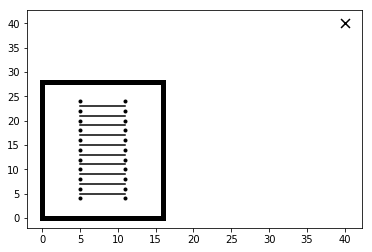

In [2]:
# create an algae farm
farm = Algae_Farm(5, 5, 2, 6, 10, 40, 40)

# show coverage scenario
fig, ax = plt.subplots(1)
farm.plot(ax)
pts = farm.simple_coverage()
ax.plot(pts.T[0], pts.T[1], "k.")
fig.show()

In [3]:
# create first segment
seg = Indirect("auv2d", [10, 10], [100, 10, 100], [0, -1, -1], [1, 1, 1], True)

# departure state
t0 = 0
s0 = np.array([farm.dsx, farm.dsy, 0, 0])
tf = 100
sf = np.hstack((pts[-1], [0, 0]))
seg.set(0, np.array([farm.dsx, farm.dsy, 0, 0]), 10, sf, np.random.randn(4)*20, [0.999], True)
seg.mismatch()

array([0.004838  , 0.00179965, 0.05955615, 0.01873931, 0.9980357 ])

In [10]:
# optimisation problem
prob = pg.problem(seg)

# instantiate SNOPT algorithm
algo = pg7.snopt7(True, "/home/cisprague/Dev/SNOPT/libsnopt7_c.so")
algo.set_integer_option("Major iterations limit", 4000)
algo.set_integer_option("Iterations limit", 40000)
algo.set_numeric_option("Major optimality tolerance", 1e-2)
algo.set_numeric_option("Major feasibility tolerance", 1e-8)
algo = pg.algorithm(algo)

In [11]:
# instantiate population
pop = pg.population(prob, 1)
pop = algo.evolve(pop)

ValueError: 
function: evolve
where: /pagmo_plugins_nonfree/include/pagmo_plugins_nonfree/snopt7.hpp, 506
what: 
An error occurred while loading the snopt7_c library at run-time. This is typically caused by one of the following
reasons:

- The file declared to be the snopt7_c library, i.e. /home/cisprague/Dev/SNOPT/libsnopt7_c.so, is not a shared library containing the necessary C interface symbols (is the file path really pointing to
a valid shared library?)
 - The library is found and it does contain the C interface symbols, but it needs linking to some additional libraries that are not found
at run-time.

We report the exact text of the original exception thrown:

 boost::dll::shared_library::load() failed (dlerror system message: libgfortran.so.3: cannot open shared object file: No such file or directory): Bad file descriptor


In [ ]:
dynamics.__dict__['auv2d']